<a href="https://colab.research.google.com/github/WalnerPessoa/REPOSITORIES/blob/master/Aula_Probabilidade_Estatistica_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
link = 'https://drive.google.com/open?id=11Va4HMDZat-TrWw3AHXL4yMGnpr8WDFz'

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

11Va4HMDZat-TrWw3AHXL4yMGnpr8WDFz


In [0]:
import pandas as pd
import glob
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import scipy.stats 
import scipy as sp


## Estatística Exploratória



In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df = pd.read_csv('Filename.csv')
# Dataset is now stored in a Pandas Dataframe

## Variáveis qualitativas x Variáveis quantitativas

In [0]:
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [0]:
print(np.mean(df['height_cm']), np.median(df['height_cm']), np.mean(df['overall']), np.median(df['overall']))


181.36218404639456 181.0 66.24499398183609 66.0


In [0]:

percentiles = np.array([2.5, 25, 50, 75, 97.5])

percentiles =  np.percentile(df['overall'], percentiles) 

print(percentiles)

[52. 62. 66. 71. 80.]


In [0]:
sns.set()

<function matplotlib.pyplot.show>

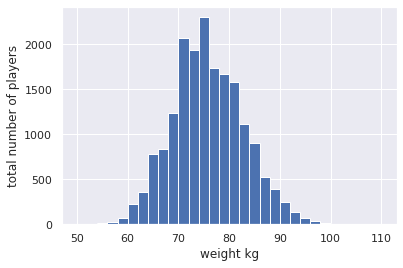

In [0]:
_ =plt.hist(df['weight_kg'], bins=30)
_ =plt.xlabel('weight kg')
_ =plt.ylabel('total number of players')

plt.show

In [0]:


BAR = df.loc[df['club'] == 'FC Barcelona']
PSG = df.loc[df['club'] == 'Paris Saint-Germain']
BOD = df.loc[df['club'] == 'Borussia Dortmund']

fname = [BAR,PSG,BOD]
result = pd.concat(fname)


In [0]:
BOD

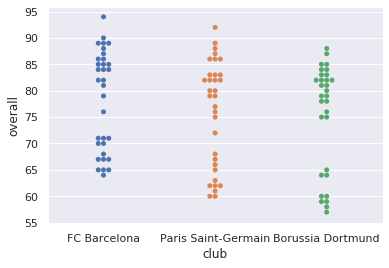

In [0]:
_ = sns.swarmplot(x='club', y='overall', data=result)


# Label the axes
_ = plt.xlabel('club')
_ = plt.ylabel('overall')


# Show the plot
plt.show()


Making an ECDF (Empirical distribution function)

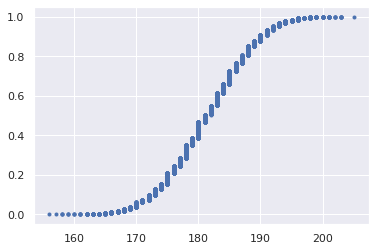

In [0]:
x = np.sort(df['height_cm'])
y = np.arange(1, len(x)+1)/len(x)
_ = plt.plot(x,y, marker='.', linestyle='none')

[64.8 70.  82.  86.  90.8]


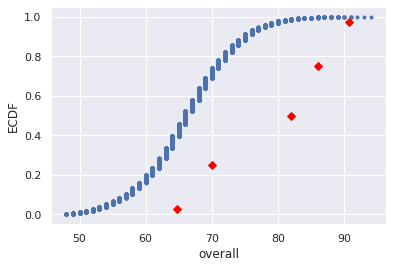

In [0]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
BAR_percentiles =  np.percentile(BAR['overall'], percentiles) 


# Print the result
print(BAR_percentiles)


# Plot the ECDF
x_fifa = np.sort(df['overall'])
y_fifa = np.arange(1, len(x)+1)/len(x)


_ = plt.plot(x_fifa, y_fifa, '.')
_ = plt.xlabel('overall')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(BAR_percentiles, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

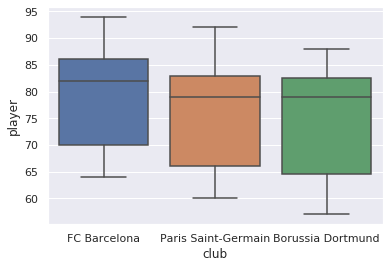

In [0]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='club', y='overall', data=result)

# Label the axes
_ = plt.xlabel('club')
_ = plt.ylabel('player')


# Show the plot
plt.show()

In [0]:
BAR_variance=np.var(BAR['overall'])
PSG_variance=np.var(PSG['overall'])
BOD_variance=np.var(BOD['overall'])


print(BAR_variance,BOD_variance,PSG_variance)
print(BAR_variance**0.5,BOD_variance**0.5,PSG_variance**0.5)

85.1404958677686 98.73465140478669 97.23415977961433
9.227160769585009 9.936531155528407 9.860738297897086


In [0]:
result = result.loc[df['player_positions'] != 'GK']

In [0]:
# Plot the mentality positioning versus dribbling
_ = plt.plot(result['mentality_positioning'].values, result['dribbling'].values, marker='.', linestyle='none')


_ = plt.xlabel('mentality_pos')
_ = plt.ylabel('dribbling')

slope = 0.5720854472892977 mentality_pos / percent dribbling
intercept = 36.98338688961828 mentality_pos


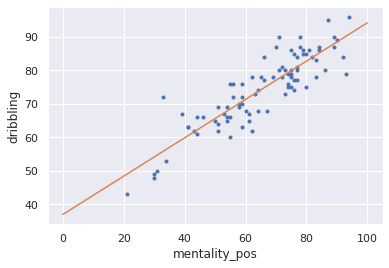

In [0]:
# Plot the mentality positioning versus dribbling
_ = plt.plot(result['mentality_positioning'].values, result['dribbling'].values, marker='.', linestyle='none')


_ = plt.xlabel('mentality_pos')
_ = plt.ylabel('dribbling')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(result['mentality_positioning'].values,result['dribbling'].values,deg=1)

# Print the results to the screen
print('slope =', a, 'mentality_pos / percent dribbling')
print('intercept =', b, 'mentality_pos')

# Make theoretical line to plot

x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

In [0]:
def pearson_r(x, y):
    corr_mat=np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. : r
r=pearson_r(result['mentality_positioning'],result['dribbling'])

# Print the result
print(r)

0.8781468805832287


## Definição: Variáveis aleatórias

Consideremos um experimento e $ \Omega $ o espaço amostral associado a esse experimento. Uma função X, que associa a cada elemento $ \omega \in \Omega $ um número real, $ X(\omega) $, é denominada variável aleatória (v.a.). Ou seja, variável aleatória é um característico numérico do resultado de um experimento.


## Álgebra

$ \varnothing\in\mathcal{A} $;

Se $ A,B\in\mathcal{A} $ então $ A\cap B\in\mathcal{A} $.

Se $ A\in\mathcal{A} $, então $ A^c\in\mathcal{A} $.


## Variável Aleatótia Discreta

Seja $ X $ uma variável aleatória (v.a.). Se o número de valores possíveis de $ X $ for enumerável (finito ou infinito), dizemos que $ X $ é uma variável aleatória discreta.

In [0]:
#prob de escolher um jogador brasi

0.04508151876572929

## Variável Aleatótia Contínua

Seja $ X $ uma variável aleatória. Suponha que o contradomínio ($ \mathbb{R}_x $) de $ X $ seja um intervalo ou uma coleção de intervalos.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show>

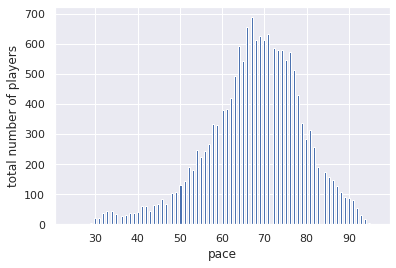

In [0]:
_ =plt.hist(df['pace'], bins=150)
_ =plt.xlabel('pace')
_ =plt.ylabel('total number of players')

plt.show

## Eventos independentes

Dois eventos $ A $ e $ B $ são ditos independentes se


$\mathbb{P}(A\cap B)=\mathbb{P}(A) \mathbb{P}(B).$



## Probabilidade Condicional

Como para dois eventos quaisquer $ E $ e $ F $, a probabilidade condicional de $ E $ dado $ F $ é definida, desde que $ \mathbb{P}(F)>\ 0 $, por


$\mathbb{P}(E|F)=\frac{\mathbb{P}(E\cap F)}{\mathbb{P}(F)}$

In [0]:
## Dado que um jogador escolhido ao acaso é Brasileiro e tem mais de 26 anos, qual a probabilidade de ele ser o Neymar?




0.0017064846416382253

##Questão Hackathon

Supondo que você tenha duas moedas, uma viciada que tem probabilidade de 3/4  de cair coroa e outra não viciada que tem probabilidade de 1/2 de cair coroa. Você pega uma delas aleatoriamente e joga duas vezes e consegue coroa nas duas vezes. Qual a probabilidade da moeda que você pegou ser a não viciada? 

##Teorema 1.4.3(Teorema de Bayes):

Sejam $ A_1,A_2,\ldots,A_n $ eventos que formam uma partição do espaço amostral, e assuma que $ \mathbb{P}(A_i) > 0 $ para todo $ i $. Então, para qualquer evento $ B $ tal que $ \mathbb{P}(B) > 0 $, temos que


$\mathbb{P}(A_i|B)=\frac{\mathbb{P}(A_i)\mathbb{P}(B|A_i)}{\mathbb{P}(B)}=\frac{\mathbb{P}(A_i)\mathbb{P}(B|A_i)}{\mathbb{P}(A_1)\mathbb{P}(B|A_1)+\ldots+\mathbb{P}(A_n)\mathbb{P}(B|A_n)}.	$
 

Para verificar o teorema de Bayes, basta notar que $ \mathbb{P}(A_i)\mathbb{P}(B|A_i) = \mathbb{P}(B)\mathbb{P}(A_i|B) $ já que ambos são iguais a $ \mathbb{P}(A\cap B) $, o que garante a primeira igualdade. A segunda igualdade segue da aplicação do teorema da probabilidade total para $ B $.

In [0]:
# Considerando os Jogadores Ingleses e Belgas do dataset, qual a probabilidade de se escolher ingleses com valor de mercado maior que 4 000 000 de euros 
# e Belgas com salário maior que 50 000 euros?

Omega_Belgium= (df['nationality'] == 'Belgium')
Omega_England = (df['nationality'] == 'England')

Omega_Belgium = df[Omega_Belgium]
Omega_England = df[Omega_England]

Omega_Belgium_Wage = np.sum(Omega_Belgium['wage_eur'] >= 50000)
Omega_England_Value = np.sum(Omega_England['value_eur'] >= 4000000)

Prob_Belgium_Wage = Omega_Belgium_Wage/len(Omega_Belgium)
Prob_England_Value = Omega_England_Value/len(Omega_England)

Prob_Belgium_Wage*Prob_England_Value



0.008075996740950317

In [0]:
Omega_Belgium

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,91,91,90000000,370000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,166500000.0,"#Dribbler, #Playmaker , #Engine, #Distance Sh...",RCM,17.0,NaN,2015-08-30,2023.0,RCM,7.0,76.0,86.0,92.0,86.0,61.0,78.0,NaN,NaN,NaN,...,76,61,88,94,79,91,68,58,51,15,13,5,10,13,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
28,192119,https://sofifa.com/player/192119/thibaut-court...,T. Courtois,Thibaut Courtois,27,1992-05-11,199,96,Belgium,Real Madrid,88,89,48000000,235000,GK,Left,4,2,1,Medium/Medium,Courtois,Yes,102000000.0,NaN,GK,13.0,NaN,2018-08-09,2024.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,89.0,72.0,...,23,15,13,44,27,66,20,18,16,85,89,72,85,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,172871,https://sofifa.com/player/172871/jan-vertonghe...,J. Vertonghen,Jan Vertonghen,32,1987-04-24,189,86,Belgium,Tottenham Hotspur,87,87,32500000,155000,CB,Left,3,3,3,High/High,Normal,Yes,60100000.0,"#Tackling , #Tactician",LCB,5.0,NaN,2012-07-01,2020.0,LCB,5.0,63.0,63.0,74.0,72.0,87.0,79.0,NaN,NaN,NaN,...,84,89,56,68,66,84,89,87,88,6,10,9,12,7,69+3,69+3,69+3,68+3,69+3,69+3,69+3,68+3,70+3,70+3,70+3,70+3,74+3,74+3,74+3,70+3,79+3,82+3,82+3,82+3,79+3,80+3,84+3,84+3,84+3,80+3
48,175943,https://sofifa.com/player/175943/dries-mertens...,D. Mertens,Dries Mertens,32,1987-05-06,169,61,Belgium,Napoli,87,87,40000000,135000,"CF, ST",Right,3,4,4,High/Low,Normal,Yes,68000000.0,"#Dribbler, #Acrobat, #Clinical Finisher, #Comp...",SUB,14.0,NaN,2013-07-01,2020.0,RF,14.0,88.0,83.0,80.0,91.0,35.0,53.0,NaN,NaN,NaN,...,59,36,87,83,79,81,25,40,40,7,10,8,10,4,78+3,78+3,78+3,86+3,85+3,85+3,85+3,86+3,85+3,85+3,85+3,85+3,78+3,78+3,78+3,85+3,65+3,60+3,60+3,60+3,65+3,60+3,46+3,46+3,46+3,60+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17233,248387,https://sofifa.com/player/248387/alexandre-ipp...,A. Ippolito,Alexandre Ippolito,20,1999-01-05,177,69,Belgium,Royal Excel Mouscron,55,66,140000,2000,ST,Right,1,3,2,Medium/Medium,Normal,No,231000.0,NaN,RES,27.0,NaN,2018-07-01,2022.0,NaN,NaN,71.0,57.0,44.0,60.0,18.0,43.0,NaN,NaN,NaN,...,28,10,46,47,59,50,15,19,16,12,14,8,6,13,53+2,53+2,53+2,54+2,54+2,54+2,54+2,54+2,53+2,53+2,53+2,51+2,44+

## Ensaios de Bernoulli

Em cada ensaio considera-se somente a ocorrência ou não-ocorrência de um certo evento que será denominado sucesso (S) e cuja não-ocorrência será denominada falha (F).

Os ensaios são independentes.

A probabilidade de sucesso, que denotaremos por p é a mesma para cada ensaio. A probabilidade de falha será denotada por 1-p.

A probabilidade de um ponto amostral com sucessos nos $ k $ primeiros ensaios e falhas nos $ n-k $ ensaios seguintes é $ p^k(1-p)^{n-k}. $



## Distribuição Binomial


Seja $ X $ o número de sucessos obtidos na realização de $ n $ ensaios de Bernoulli independentes. Diremos que $ X $ tem distribuição binomial com parâmetros $ n $ e $ p $, em que $ p $ é a probabilidade de sucesso em cada ensaio, se sua função de probabilidade for dada por


$p(x) = \mathbb{P}[X=k]=\left(\begin{array}{c}n\\k\end{array}\right) p^k(1-p)^{n-k}.$



In [0]:
# Considerando os Jogadores Brasileiros e Fanceses do dataset, qual a probabilidade de se escolher 2 em 11 jogadores com overall acima de 83 para cada pais?

In [0]:


Omega_Brazil = (df['nationality'] == 'Brazil')
Omega_France = (df['nationality'] == 'France')

Omega_France = df[Omega_France]
Omega_Brazil = df[Omega_Brazil]

Event_Brazil = np.sum(Omega_Brazil['overall'] >= 83)
Event_France = np.sum(Omega_France['overall'] >= 83)
    
probability_of_1_brazilian = Event_Brazil/len(Omega_Brazil)
probability_of_1_french = Event_France/len(Omega_France)


print(probability_of_1_brazilian,probability_of_1_french)

binomial_brazil = binom.pmf(2,11,probability_of_1_brazilian)
binomial_france = binom.pmf(2,11,probability_of_1_french)

print(binomial_brazil,binomial_france)


0.03519417475728155 0.02540650406504065
0.04934731351799295 0.028162038549074488


0.9720873786407767


<function matplotlib.pyplot.show>

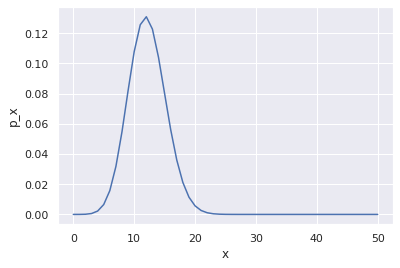

In [0]:

Event_Brazil = np.sum(Omega_Brazil['height_cm'] <= 192)

probability_of_1_brazilian = Event_Brazil/len(Omega_Brazil)

print(probability_of_1_brazilian)

n = 50

x = range(0,n+1) # valores de x =0,1,2,3 ou 4

p = binom.pmf(n,50,probability_of_1_brazilian)

p_x = binom.pmf(x,n,p) #distribuição dos resultados
 
p_x

plt.xlabel('x')
plt.ylabel('p_x')

plt.plot(p_x)
plt.show

## Distribuição Normal e Intervalo de Confiaça


Uma variável aleatória contínua $ X $ tem distribuição Normal se sua função densidade de probabilidade for dada por:


$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right], \quad x\in(-\infty,\infty).	$
 

Usamos a notação $ X\sim N(\mu,\sigma^2). $

![alt text](https://www.portalaction.com.br/sites/default/files/EstatisticaBasica/figuras/distribuicaoNormal/normal3.PNG)

71.5468869679396
6.139669074956248


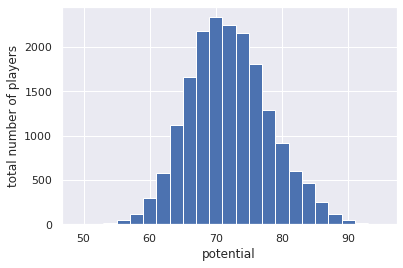

In [0]:
## Achar um intervalo de confianca usando (age)

_ =plt.hist(df['potential'], bins=23)
_ =plt.xlabel('potential')
_ =plt.ylabel('total number of players')

plt.show

print(df['potential'].mean())
print((df['potential'].var())**(0.5))


In [0]:
conjunto = 1.0*np.array(df['potential'])
              
print(conjunto)                                                           

#calcular a matriz média                                               
media = conjunto.mean(axis=0)                                             
print('media:{}'.format(media))                                            

desvio_padrao = np.std(conjunto)                                          
conf_int = scipy.stats.norm.interval(0.99, loc=media, scale=desvio_padrao) 
print("intervalo de confiança: ")
print(conf_int)




[94. 93. 92. ... 56. 54. 51.]
media:71.5468869679396
intervalo de confiança: 
(55.73258007328557, 87.36119386259362)


<function matplotlib.pyplot.show>

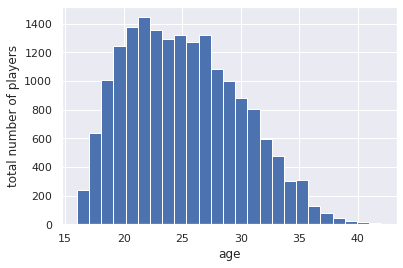

In [0]:
_ =plt.hist(df['age'], bins=25)
_ =plt.xlabel('age')
_ =plt.ylabel('total number of players')

plt.show

In [0]:
conjunto = 1.0*np.array(df['age'])
              
print(conjunto)                                                           

#calcular a matriz média                                               
media = conjunto.mean(axis=0)                                             
print('media:{}'.format(media))                                            

desvio_padrao = np.std(conjunto)                                          
conf_int = scipy.stats.norm.interval(0.99, loc=media, scale=desvio_padrao) 
print("intervalo de confiança: ")
print(conf_int)

[32. 34. 27. ... 19. 18. 26.]
media:25.283291388554545
intervalo de confiança: 
(13.288073915601162, 37.27850886150793)


## Avaliação

Quem foi o melhor de jogador de Basket de todos os tempos? LeBron James, Michael Jordan ou Kobe Bryant?

Pelo menos 11 evidências com explicações claras, gráficos, estatísticas, modelos, distribuições probabilísticas, etc.  O trabalho deverá ser feito em um jupyter notebook. Será necessário colocar a fonte dos datasets utilizados para cada evidência. A qualidade do trabalhos será determinada a partir da apresentação, argumentação, criatividade, conhecimento, esforço, pesquisa e originalidade.


Ps: Quem copiar, terá a nota zerada.